In [1]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from photutils.aperture import CircularAperture
from astropy.stats import mad_std
import numpy as np
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt

In [2]:
#Abrimos el fits de las estrellas
star_1b = fits.open('Star1_B.fits')[0].data
star_1v = fits.open('Star1_V.fits')[0].data
star_2b = fits.open('Star2_B.fits')[0].data
star_2v = fits.open('Star2_V.fits')[0].data

In [3]:
fits.open('Star1_B.fits')[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{da52125b-74f6-49

In [4]:
#Calcular desviación del fondo (background noise)
bkg_1b = mad_std(star_1b)
bkg_1v = mad_std(star_1v)
bkg_2b = mad_std(star_2b)
bkg_2v = mad_std(star_2v)

In [5]:
#Threshold, para cada estrella
threshold_1b = detect_threshold(star_1b, nsigma = 5)
threshold_1v = detect_threshold(star_1v, nsigma = 5)
threshold_2b = detect_threshold(star_2b, nsigma = 5)
threshold_2v = detect_threshold(star_2v, nsigma = 5)
#Detectamos fuentes
sour_1b = detect_sources(star_1b, threshold_1b, npixels=50)
sour_1v = detect_sources(star_1v, threshold_1v, npixels=50)
sour_2b = detect_sources(star_2b, threshold_2b, npixels=50)
sour_2v = detect_sources(star_1v, threshold_2v, npixels=50)

In [6]:
#Crear catálogos de las fuentes detectadas
cat_1b = SourceCatalog(star_1b, sour_1b)
cat_1v = SourceCatalog(star_1v, sour_1v)
cat_2b = SourceCatalog(star_2b, sour_2b)
cat_2v = SourceCatalog(star_2v, sour_2v)

C:\Users\Valem\anaconda3\envs\astro_env\lib\site-packages\gwcs\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [7]:
# HIP 117678 - Filtro B
tabla_1b = cat_1b.to_table()
fuente_max_1b = tabla_1b[np.argmax(tabla_1b['segment_flux'])]
print("HIP 117678 Filtro B (fuente más brillante):")
print(f"label = {fuente_max_1b['label']}, x = {fuente_max_1b['xcentroid']}, y = {fuente_max_1b['ycentroid']}\n")

# HIP 117678 - Filtro V
tabla_1v = cat_1v.to_table()
fuente_max_1v = tabla_1v[np.argmax(tabla_1v['segment_flux'])]
print("HIP 117678 Filtro V (fuente más brillante):")
print(f"label = {fuente_max_1v['label']}, x = {fuente_max_1v['xcentroid']}, y = {fuente_max_1v['ycentroid']}\n")

# HIP 116375 - Filtro B
tabla_2b = cat_2b.to_table()
fuente_max_2b = tabla_2b[np.argmax(tabla_2b['segment_flux'])]
print("HIP 116375 Filtro B (fuente más brillante):")
print(f"label = {fuente_max_2b['label']}, x = {fuente_max_2b['xcentroid']}, y = {fuente_max_2b['ycentroid']}\n")

# HIP 116375 - Filtro V
tabla_2v = cat_2v.to_table()
fuente_max_2v = tabla_2v[np.argmax(tabla_2v['segment_flux'])]
print("HIP 116375 Filtro V (fuente más brillante):")
print(f"label = {fuente_max_2v['label']}, x = {fuente_max_2v['xcentroid']}, y = {fuente_max_2v['ycentroid']}")



HIP 117678 Filtro B (fuente más brillante):
label = 4, x = 2042.7020573758546, y = 2035.7101685706448

HIP 117678 Filtro V (fuente más brillante):
label = 8, x = 2049.3697421013526, y = 2036.1845864250633

HIP 116375 Filtro B (fuente más brillante):
label = 6, x = 2042.0015738048537, y = 2044.5479773893758

HIP 116375 Filtro V (fuente más brillante):
label = 8, x = 2043.1034286171885, y = 2044.0865626771


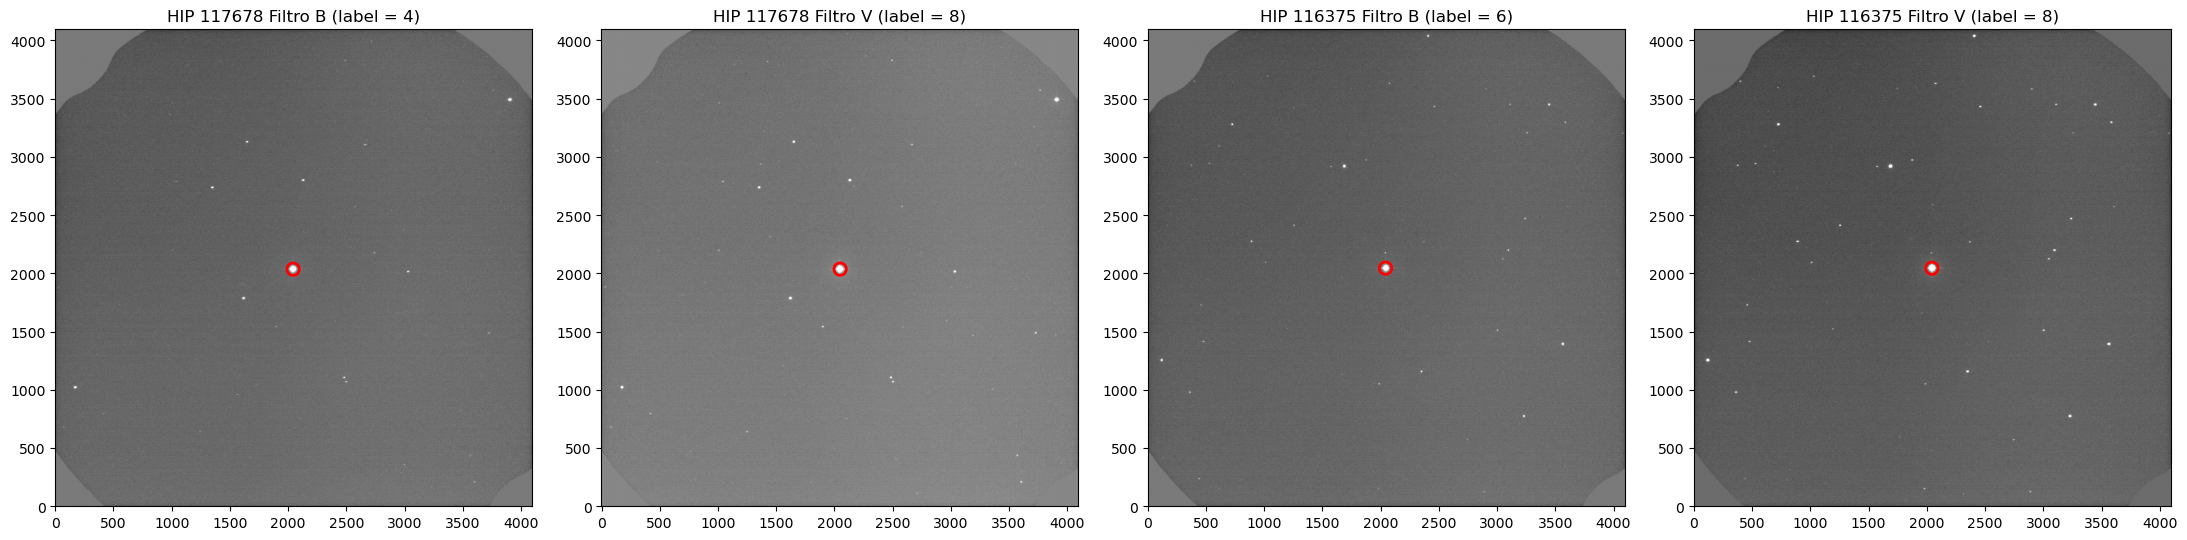

In [8]:
#Busque manualmente la estrella mas brillantes y revise graficando si es la estrella 
zscale = ZScaleInterval(contrast=0.25)
fig, ax = plt.subplots(1, 4, figsize=(22, 6))

vmin, vmax = zscale.get_limits(star_1b)
ax[0].imshow(star_1b, vmin=vmin, vmax=vmax, cmap='gray', origin='lower')
ax[0].scatter(2042.7020573758546, 2035.7101685706448, s=80, edgecolor='red', facecolor='none', lw=2)
ax[0].set_title("HIP 117678 Filtro B (label = 4)")
vmin, vmax = zscale.get_limits(star_1v)
ax[1].imshow(star_1v, vmin=vmin, vmax=vmax, cmap='gray', origin='lower')
ax[1].scatter(2049.3697421013526, 2036.1845864250633, s=80, edgecolor='red', facecolor='none', lw=2)
ax[1].set_title("HIP 117678 Filtro V (label = 8)")
vmin, vmax = zscale.get_limits(star_2b)
ax[2].imshow(star_2b, vmin=vmin, vmax=vmax, cmap='gray', origin='lower')
ax[2].scatter(2042.0015738048537, 2044.5479773893758, s=80, edgecolor='red', facecolor='none', lw=2)
ax[2].set_title("HIP 116375 Filtro B (label = 6)")
vmin, vmax = zscale.get_limits(star_2v)
ax[3].imshow(star_2v, vmin=vmin, vmax=vmax, cmap='gray', origin='lower')
ax[3].scatter(2043.1034286171885, 2044.0865626771, s=80, edgecolor='red', facecolor='none', lw=2)
ax[3].set_title("HIP 116375 Filtro V (label = 8)")



plt.tight_layout()
plt.show()


In [9]:
# Tomar la primera fuente del catálogo, la primera fuente,es la más brillante 
#Usea las fuentes mas brillantes que son nuestra estrella
indice_estrella1b = np.where(tabla_1b['label'] == 4)[0][0]
indice_estrella1v = np.where(tabla_1v['label'] == 8)[0][0]

indice_estrella2b = np.where(tabla_2b['label'] == 6)[0][0]
indice_estrella2v = np.where(tabla_2v['label'] == 8)[0][0]

# Dispersión (σ) del eje mayor y menor de la elipse ajustada
sigma_major1b = tabla_1b['semimajor_sigma'][indice_estrella1b].value
sigma_minor1b = tabla_1b['semiminor_sigma'][indice_estrella1b].value

sigma_major1v = tabla_1v['semimajor_sigma'][indice_estrella1v].value
sigma_minor1v = tabla_1v['semiminor_sigma'][indice_estrella1v].value

sigma_major2b = tabla_2b['semimajor_sigma'][indice_estrella2b].value
sigma_minor2b = tabla_2b['semiminor_sigma'][indice_estrella2b].value

sigma_major2v = tabla_2v['semimajor_sigma'][indice_estrella2v].value
sigma_minor2v = tabla_2v['semiminor_sigma'][indice_estrella2v].value

# FWHM promedio en píxeles, el 2.355 es por formula
fwhm_1b = 2.355 * np.mean([sigma_major1b, sigma_minor1b])
print(f"FWHM HIP 117678 Filtro B = {fwhm_1b} píxeles")

fwhm_1v = 2.355 * np.mean([sigma_major1v, sigma_minor1v])
print(f"FWHM HIP 117678 Filtro V = {fwhm_1v} píxeles")

fwhm_2b = 2.355 * np.mean([sigma_major2b, sigma_minor2b])
print(f"FWHM HIP 116375 Filtro B = {fwhm_2b} píxeles")

fwhm_2v = 2.355 * np.mean([sigma_major2v, sigma_minor2v])
print(f"FWHM HIP 116375 Filtro V = {fwhm_2v} píxeles")

# Conversión a arcosegundos
pixscale = 0.36  # arcsec/pixel (lo obtuve del header) PIXSCALE=0.36

seeing_1b = fwhm_1b * pixscale
seeing_1v = fwhm_1v * pixscale
seeing_2b = fwhm_2b * pixscale
seeing_2v = fwhm_2v * pixscale

print(f"\nSeeing HIP 117678 Filtro B = {seeing_1b} arcsec")
print(f"Seeing HIP 117678 Filtro V = {seeing_1v} arcsec")
print(f"Seeing HIP 116375 Filtro B = {seeing_2b} arcsec")
print(f"Seeing HIP 116375 Filtro V = {seeing_2v} arcsec")


FWHM HIP 117678 Filtro B = 13.171618996198273 píxeles
FWHM HIP 117678 Filtro V = 12.415655686668256 píxeles
FWHM HIP 116375 Filtro B = 10.734889394376214 píxeles
FWHM HIP 116375 Filtro V = 12.195820306533399 píxeles

Seeing HIP 117678 Filtro B = 4.741782838631378 arcsec
Seeing HIP 117678 Filtro V = 4.469636047200572 arcsec
Seeing HIP 116375 Filtro B = 3.864560181975437 arcsec
Seeing HIP 116375 Filtro V = 4.390495310352024 arcsec


In [10]:
#Promedio total
valores = [seeing_1b, seeing_1v, seeing_2b, seeing_2v]
seeing_promedio = np.mean(valores)
print(f"Seeing promedio = {seeing_promedio} arcsec")

Seeing promedio = 4.366618594539853 arcsec
